In [15]:
import os
os.getcwd()

'D:\\courses\\insight_data_science\\Insight_data_science'

In [16]:
import pandas as pd
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [17]:
%matplotlib inline

In [18]:
MRI_AD = pd.read_csv('R2s_mean.csv', na_values=['NA'], index_col=['subject'])
MRI_AD.head(n=5)

,ID,CDR,MMSE,amyloid,PET_tracer,ab42_stat,gender,age,ctx-bankssts,ctx-caudalanteriorcingulate,...,wm-cerebellum,ctx-cerebellum,thalamus,caudate,putamen,pallidum,hippocampus,amygdala,GM,WM
subject,,,,,,,,,,,,,,,,,,,,,
AD4,1,0.0,30,positive,PiB,1,M,65,19.802828,16.415900,...,17.064649,17.511120,21.505069,24.580769,28.997537,36.388054,16.788996,17.833733,19.179176,20.832341
AD5,2,0.0,29,negative,PiB,0,F,79,18.342368,15.692319,...,14.265215,12.492735,20.649328,24.536857,30.475405,40.790454,19.010596,16.029070,18.533750,20.827902
AD6,3,0.0,30,negative,PiB,0,F,74,17.329492,14.064403,...,14.885239,15.472910,18.774864,18.914193,23.467916,33.918651,16.261647,16.271197,17.040058,18.568596
AD7,4,0.5,26,positive,PiB,1,F,79,21.225398,17.714105,...,19.667387,18.094276,24.486720,32.167129,41.509962,51.811002,19.895585,21.588230,21.008977,22.982659
AD8,5,0.5,30,NaN,NaN,0,M,72,18.630182,16.043634,...,16.381261,12.705403,21.814847,24.584332,35.125012,37.056673,15.026736,20.597741,17.436004,19.687555


In [19]:
PET_AD = pd.read_table('suvr.txt', na_values=['NA'], index_col=['subject'])
PET_AD.head(n=5)

,ID,CDR,MMSE,amyloid,PET_tracer,ab42_stat,gender,age,ctx-bankssts,ctx-caudalanteriorcingulate,...,ctx-temporalpole,ctx-transversetemporal,wm-cerebellum,ctx-cerebellum,thalamus,caudate,putamen,pallidum,hippocampus,amygdala
subject,,,,,,,,,,,,,,,,,,,,,
AD4,1,0.0,30,positive,PiB,1,M,65,1.9865,1.9617,...,1.4533,1.8135,1.5785,1,1.8507,1.6624,2.0614,1.9042,1.3035,1.3734
AD5,2,0.0,29,negative,PiB,0,F,79,1.1835,1.0385,...,1.0433,1.1013,1.7231,1,1.4238,0.9978,1.3678,1.7491,1.1173,1.2343
AD6,3,0.0,30,negative,PiB,0,F,74,1.2877,1.1414,...,1.1457,1.1616,1.7347,1,1.5018,1.1264,1.4313,1.7780,1.2927,1.2442
AD7,4,0.5,26,positive,PiB,1,F,79,2.0076,1.8313,...,1.2689,1.6716,1.6842,1,2.0354,1.8748,2.0818,1.9877,1.3401,1.3718
AD8,5,0.5,30,NaN,NaN,0,M,72,0.0000,0.0000,...,0.0000,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [20]:
mask = (PET_AD['amyloid'].notnull()) & (PET_AD['PET_tracer'] == 'PiB')
MRI_data = MRI_AD.ix[mask, 'ctx-bankssts':'ctx-transversetemporal']
PET_data = PET_AD.ix[mask, 'ctx-bankssts':'ctx-transversetemporal']
PET_target = PET_AD.ix[mask, 'ab42_stat']
print([MRI_data.shape, PET_data.shape]) 

[(20, 34), (20, 34)]


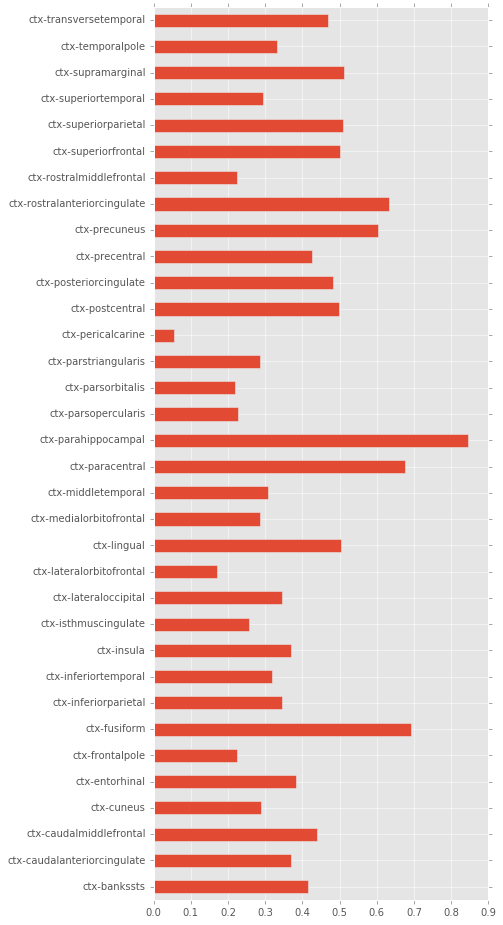

In [21]:
paircorr = MRI_data.corrwith(PET_data)
plt.figure(figsize=(6, 16))
paircorr.plot.barh()

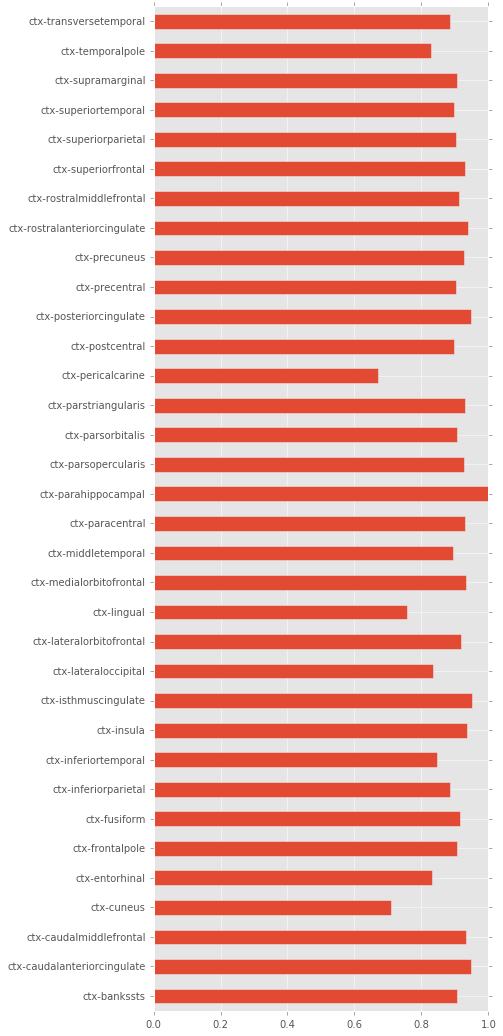

In [22]:
PET_corr = PET_data.corrwith(PET_data['ctx-parahippocampal'])
plt.figure(figsize=(6, 18))
PET_corr.plot.barh()

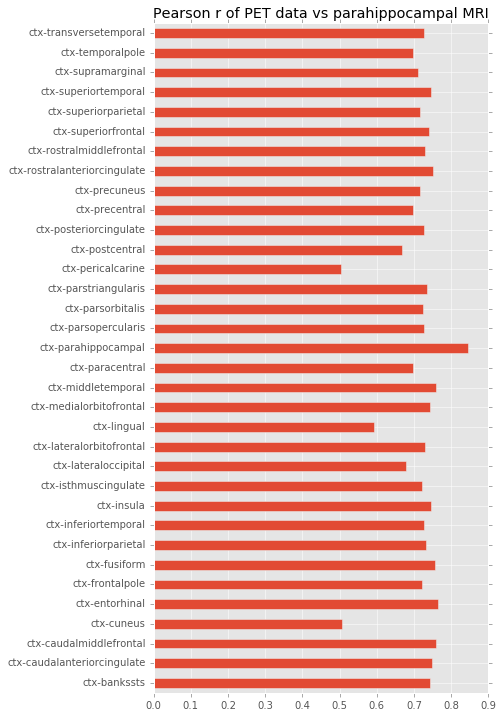

In [23]:
para_corr = PET_data.corrwith(MRI_data['ctx-parahippocampal'])
plt.figure(figsize=(6, 12))
para_corr.plot.barh()
plt.title('Pearson r of PET data vs parahippocampal MRI')

In [24]:
import seaborn as sns
import scipy.stats
import statsmodels.sandbox.stats.multicomp

In [25]:
pearson = [scipy.stats.pearsonr(MRI_data[column], PET_data[column]) for column in MRI_data]
df_pearson = pd.DataFrame(pearson, columns=['r', 'p'], index=MRI_data.columns)
reject, pval_adjusted, alphaS, alphaB = statsmodels.sandbox.stats.multicomp.multipletests(df_pearson['p'], 
                                                                                          alpha=0.05, 
                                                                                          method='fdr_bh')
df_pearson['p_adjusted'] = pval_adjusted
df_pearson = df_pearson.T
df_pearson.head(n=3)

,ctx-bankssts,ctx-caudalanteriorcingulate,ctx-caudalmiddlefrontal,ctx-cuneus,ctx-entorhinal,ctx-frontalpole,ctx-fusiform,ctx-inferiorparietal,ctx-inferiortemporal,ctx-insula,...,ctx-precentral,ctx-precuneus,ctx-rostralanteriorcingulate,ctx-rostralmiddlefrontal,ctx-superiorfrontal,ctx-superiorparietal,ctx-superiortemporal,ctx-supramarginal,ctx-temporalpole,ctx-transversetemporal
r,0.415571,0.369183,0.440020,0.287981,0.382548,0.224815,0.691048,0.344806,0.318419,0.370333,...,0.424935,0.603297,0.633748,0.223796,0.501311,0.509658,0.295255,0.512450,0.332703,0.468090
p,0.068416,0.109174,0.052198,0.218228,0.095979,0.340620,0.000741,0.136532,0.171234,0.107990,...,0.061810,0.004861,0.002697,0.342870,0.024334,0.021704,0.206300,0.020876,0.151773,0.037394
p_adjusted,0.155076,0.206218,0.136518,0.280135,0.203956,0.374177,0.012233,0.232105,0.264634,0.206218,...,0.150111,0.033053,0.022925,0.374177,0.085353,0.085353,0.280135,0.085353,0.245727,0.105949


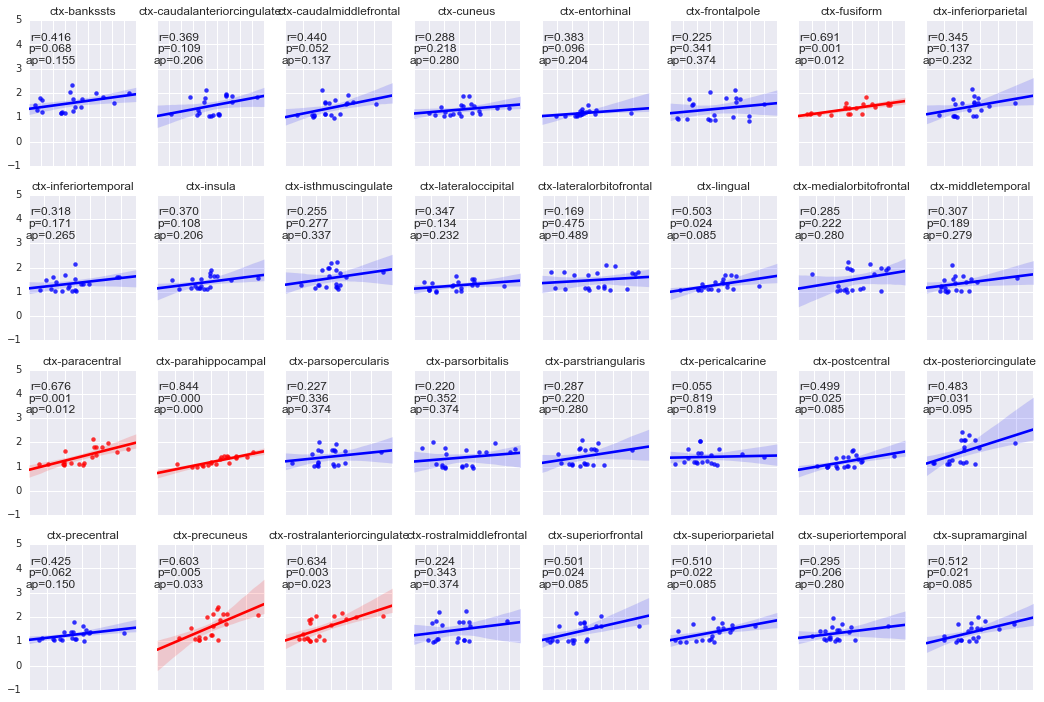

In [14]:
figs, axes = plt.subplots(4, 8, sharex=False, sharey=True)
figs.set_size_inches(18, 12)
counter = 0
for i in range(4):
    for j in range(8):
        #r, p = scipy.stats.pearsonr(R2s_data.iloc[:, counter], SUVR_data.iloc[:, counter])
        r, p, ap = df_pearson.iloc[:,counter]
        xdata, ydata = MRI_data.iloc[:, counter], PET_data.iloc[:, counter]
        if r > 0.6 and ap < 0.05:
            sns.regplot(xdata, ydata, color='r', ax=axes[i, j])
        else:
            sns.regplot(xdata, ydata, color='b', ax=axes[i, j])
        axes[i, j].set_xticklabels([''])
        axes[i, j].set_title(MRI_data.columns[counter])
        axes[i, j].set_ylabel('')
        axes[i, j].set_xlabel('')
        axes[i, j].text(0.2, 0.8, 'r=%.3f\np=%.3f\nap=%.3f' % (r, p, ap), 
                        horizontalalignment='center', 
                        verticalalignment='center',
                        transform=axes[i, j].transAxes)
        counter += 1

In [26]:
from sklearn import linear_model
def PET_data_predict(MRI_parah, region):
    reg = linear_model.LinearRegression()
    reg.fit(MRI_data['ctx-parahippocampal'].reshape(-1, 1), PET_data[region].reshape(-1, 1))
    return np.squeeze(reg.predict(MRI_parah))

Use parahippocampal MRI data to predict PET data in all regions
Use logistic regression on predicted PET data to predict overal amyloid status
Training set: 0.85
Test set: 0.69

In [27]:
PET_data_pred = np.array([PET_data_predict(MRI_data['ctx-parahippocampal'].reshape(-1, 1), region)
                          for region in PET_data.columns])
PET_data_pred = PET_data_pred.T
print(PET_data_pred.shape)

(20L, 34L)


In [58]:
logistic = linear_model.LogisticRegression()
logistic.fit(PET_data_pred, PET_target)
PET_target_pred = logistic.transform(PET_data_pred)
logistic.score(PET_data_pred, PET_target)

E:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0.84999999999999998

In [42]:
MRI_test_parah, PET_test_target = MRI_AD.ix[~mask, 'ctx-parahippocampal'], PET_AD.ix[~mask, 'ab42_stat']
print(MRI_test_parah.shape)
PET_test_data_pred = np.array([PET_data_predict(MRI_test_parah.reshape(-1, 1), region)
                          for region in PET_data.columns])
PET_test_data_pred = PET_test_data_pred.T
print(PET_test_data_pred.shape)
logistic.score(PET_test_data_pred, PET_test_target)

(16L,)
(16L, 34L)


0.6875

Use MRI data to do logistic regression and test
It overfits

In [66]:
logistic_v2 = linear_model.LogisticRegression()
logistic_v2.fit(MRI_data, PET_target)
PET_target_pred_v2 = logistic_v2.predict(MRI_data)
logistic_v2.score(MRI_data, PET_target)
#plt.scatter(MRI_data['ctx-superiorfrontal'], MRI_data['ctx-precuneus'], c=PET_target)

1.0

In [69]:
MRI_test = MRI_AD.ix[~mask, 'ab42_stat':'ctx-transversetemporal'].dropna()
print(MRI_test.shape)
MRI_test_data, PET_test_target = MRI_test.ix[:, 'ctx-bankssts':'ctx-transversetemporal'], MRI_test['ab42_stat']
logistic_v2.score(MRI_test_data, PET_test_target)

(15, 37)


0.46666666666666667

Choose valid regions to perform PCA on MRI data
The first component is "natural" global 
The second component shows some MRI "topography"
Reduce the regions to five components
Use these five components to classify groups

In [70]:
def region_correction(df):
    bad_regions = ['ctx-entorhinal','ctx-frontalpole','ctx-inferiortemporal','ctx-lateralorbitofrontal',
                   'ctx-medialorbitofrontal','ctx-pericalcarine','ctx-temporalpole','ctx-transversetemporal']
    return df.drop(bad_regions, axis=1)   

In [91]:
MRI_ctx = MRI_AD.loc[:, 'ctx-bankssts':'ctx-transversetemporal']
MRI_ctx['ab42_stat'] = MRI_AD['ab42_stat']
MRI_ctx = region_correction(MRI_ctx.dropna())
MRI_ctx_data, MRI_ctx_target = MRI_ctx.loc[:, 'ctx-bankssts':'ctx-supramarginal'], MRI_ctx['ab42_stat']
print(MRI_ctx_data.shape)

(35, 26)


In [72]:
from sklearn.decomposition import PCA

In [102]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt
matplotlib.style.use('classic')
fig = plt.figure(figsize=(6, 4))
plt.clf()
#ax_pca = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
#ax_pca.scatter(MRI_ctx_pca[:, 1], MRI_ctx_pca[:, 2], MRI_ctx_pca[:, 3], c=MRI_ctx_target)

In [95]:
def biplot(pca, x_trans, y, labels):
    #pca is returned from sklearn.decomposition.PCA()
    #x_trans = pca(x)
    #y is a Series of 
    first_comp, second_comp = x_trans[:, 0], x_trans[:, 1]
    first_rot, second_rot = pca.components_[0, :], pca.components_[1, :]
    plt.figure(figsize=(12, 12)) 
    plt.scatter(first_comp, second_comp, c=y, s= 50)
    for region in range(len(first_rot)):
        plt.arrow(0, 0, first_rot[region]*max(first_comp)*1.2, 
                  second_rot[region]*max(second_comp)*1.2, color='b')
        plt.text(first_rot[region]*max(first_comp)*1.2*1.1, 
                 second_rot[region]*max(second_comp)*1.2*1.1,
                 labels[region], color='b')    

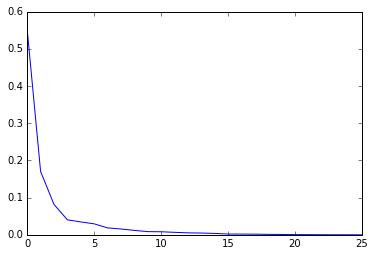

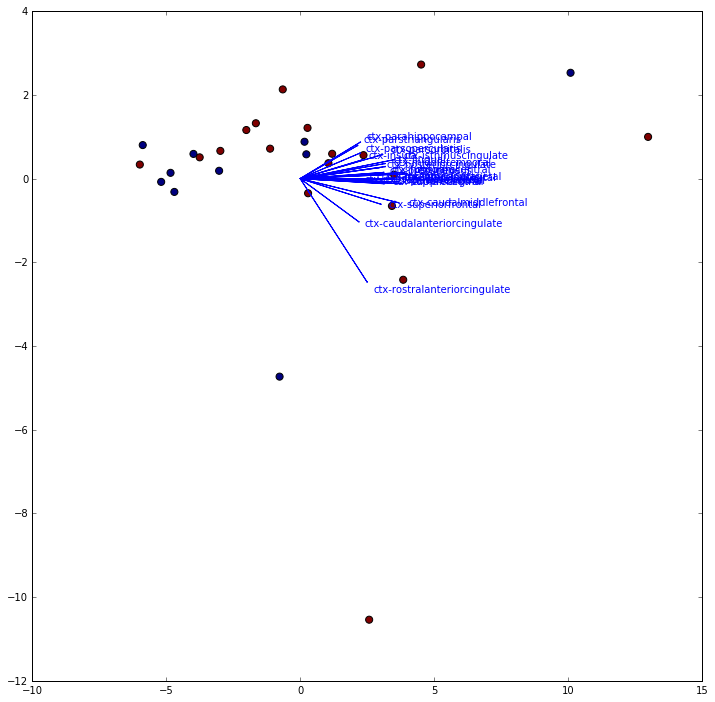

In [96]:
from sklearn.cross_validation import train_test_split
MRI_train_data, MRI_test_data, MRI_train_target, MRI_test_target = train_test_split(MRI_ctx_data, MRI_ctx_target,
                                                                                    random_state=7, test_size=0.2)
#print([MRI_train_data.shape, MRI_test_target.shape])
pca_MRI = PCA(whiten=False)
pca_MRI.fit(MRI_train_data)
MRI_train_tran = pca_MRI.transform(MRI_train_data)
plt.plot(pca_MRI.explained_variance_ratio_)
biplot(pca_MRI, MRI_train_tran, MRI_train_target, MRI_train_data.columns)

In [100]:
MRI_train_comp = MRI_train_tran[:, 0:5]
logistic_comp = linear_model.LogisticRegression()
logistic_comp.fit(MRI_train_comp, MRI_train_target)
print(logistic_comp.score(MRI_train_comp, MRI_train_target))
MRI_test_comp = pca_MRI.transform(MRI_test_data)[:, 0:5]
logistic_comp.score(MRI_test_comp, MRI_test_target)

0.857142857143


0.7142857142857143

In [120]:
from sklearn import svm
svm_MRI_comp = svm.SVC(C=100.0, gamma=0.01)
svm_MRI_comp.fit(MRI_train_comp, MRI_train_target)
print(svm_MRI_comp.score(MRI_train_comp, MRI_train_target))
MRI_test_comp = pca_MRI.transform(MRI_test_data)[:, 0:5]
svm_MRI_comp.score(MRI_test_comp, MRI_test_target)

1.0


0.5714285714285714

In [ ]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(y, n_iter=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))


In [121]:
from sklearn.grid_search import GridSearchCV
C_range = np.logspace(-4, 5, 10)
gamma_range = np.logspace(-5, 4, 10)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid)
grid.fit(MRI_train_comp, MRI_train_target)
print([grid.best_params_, grid.best_score_])

[{'C': 100.0, 'gamma': 0.01}, 0.7857142857142857]


In [85]:
pca_PET = PCA()
print([PET_data.shape, PET_target.shape])
pca_PET.fit(PET_data)
PET_ctx_pca = pca_PET.transform(PET_data)

[(20, 34), (20L,)]


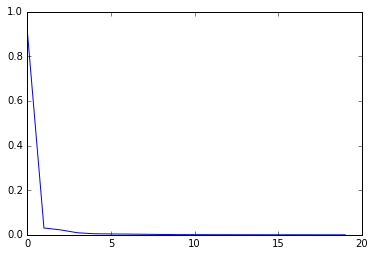

In [89]:
plt.figure()
plt.plot(pca_PET.explained_variance_ratio_)

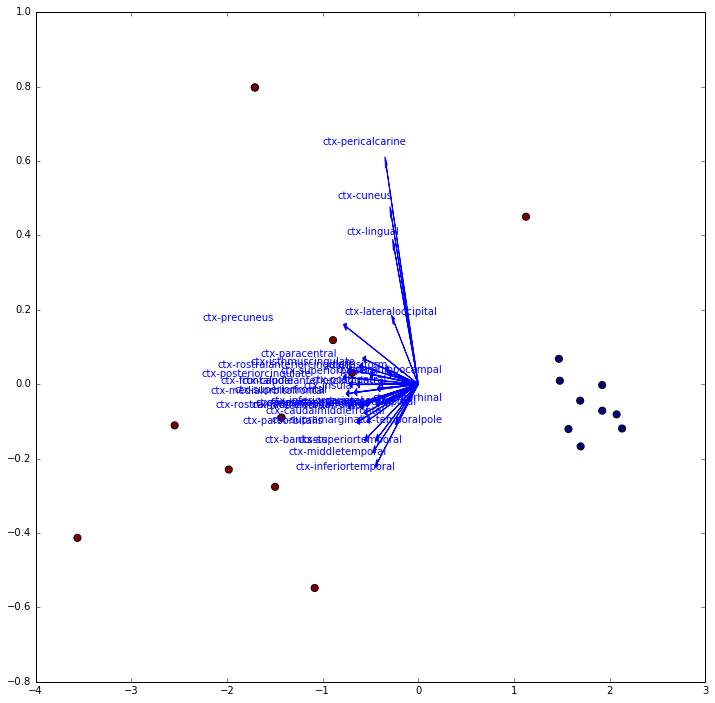

In [113]:
biplot(pca_PET, PET_ctx_pca, PET_target, PET_data.columns)

In [160]:
MRI_adv_AD = pd.read_csv('R2_mean.csv', na_values=['NA'], index_col=['subject'], skiprows=[4, 5])
MRI_adv_hippo = MRI_adv_AD.loc[:, ['CDR', 'ab42_stat', 'hippocampus']]
MRI_adv_hippo.head()

,CDR,ab42_stat,hippocampus
subject,,,
AD4,0,1,13.500613
AD5,0,0,13.235511
AD6,0,0,12.893496
AD9,1,1,10.858942
AD10,1,1,12.623293


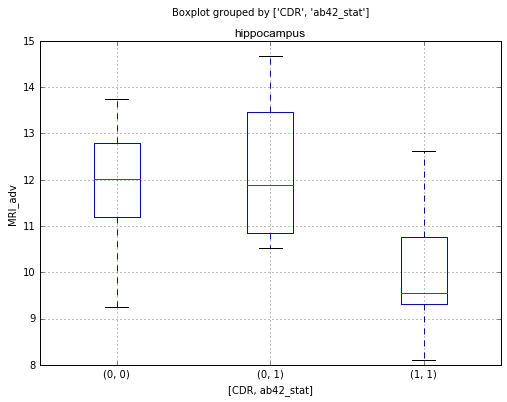

In [166]:
ax = MRI_adv_hippo.boxplot('hippocampus', by=['CDR', 'ab42_stat'], figsize=(8, 6))
#ax.set_xticklabels(['Normal', 'Preclinical', 'Mild AD'])
ax.set_ylabel('MRI_adv')

In [163]:
MRI_adv_grp = MRI_adv_hippo.groupby(['CDR', 'ab42_stat'])
MRI_adv_grp.size()

CDR  ab42_stat
0    0            13
     1            10
1    1            11
dtype: int64

In [66]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [25]:
import bokeh.plotting
fig = bokeh.plotting.figure()
fig.circle(R2s_data['ctx-parahippocampal'], SUVR_data['ctx-parahippocampal'], legend='R2s/SUVR')
fig.title = 'ctx-parahippocampal R2s vs. SUVR'

In [39]:
frames = [R2s_data, SUVR_data]
result = pd.concat(frames, axis=1, keys=['R2s', 'SUVR'])

In [144]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']
